# 使用 Function 方式撰寫爬取歷史股價爬蟲

In [1]:
import pandas as pd
import requests
import datetime
import os
%matplotlib inline

## 定義可重覆使用的 Function

In [2]:
def crawl_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+86400
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=0&period2=" + str(now) + "&interval=1d&events=history&crumb=hP2rOschxO0"
    response = requests.post(url)

    path = os.path.join('stockprice', stock_id + '.csv' )
    print(path)
    
    with open(path, 'w') as f:
        f.writelines(response.text)

    df = pd.read_csv(path, index_col='Date', parse_dates=['Date'])

    return df

## 每呼叫 Function 一次，可爬取一隻股票的歷史資料

In [20]:
df = crawl_price("1231.TW")

stockprice\1231.TW.csv


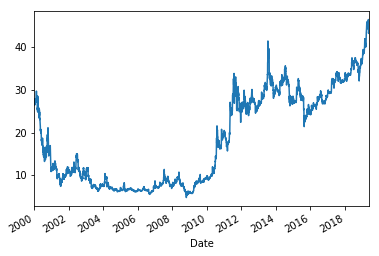

In [21]:
df.Close.plot()